In [2]:
# import packages
import torch
import matplotlib.pyplot as plt
import numpy as np
from torchsummary import summary as summary_

### Today's Topic: Modeling the CNN(Convolutional Neural Network)
We will model the cnn structure using the MNIST data set.

##1. MNIST data load

The MNIST data set is the handwriting image data from 1 to 9.

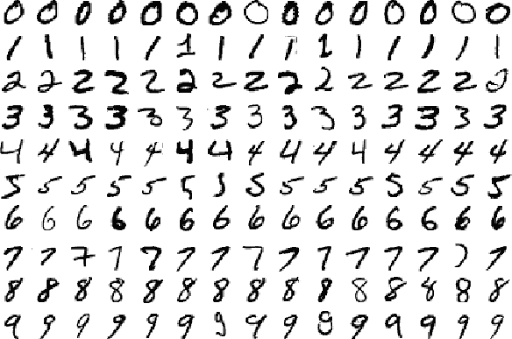


In [3]:
#Torchvision offers diverse simple dataset such as MNIST, CIFAR-10.
#It also offers famous models such as resnet and simple transfroms for preprocessing 
import torchvision.datasets as dataset
import torchvision.transforms as transforms
from torchvision import utils

In [4]:
mnist_train = dataset.MNIST(root='MNIST/',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

mnist_test = dataset.MNIST(root='MNIST/',
                            train=False,
                            transform=transforms.ToTensor(),
                            download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/MNIST/raw/train-images-idx3-ubyte.gz to MNIST/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/MNIST/raw



In [5]:
#The data type of torchvision.dataset is equal to Dataset of torch.utils.data used in previous lecture.
mnist_train

Dataset MNIST
    Number of datapoints: 60000
    Root location: MNIST/
    Split: Train
    StandardTransform
Transform: ToTensor()

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")




Train data set: 60000 Test data set: 10000
Shape of train data: torch.Size([60000, 28, 28])



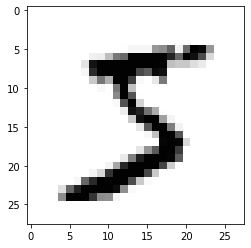

In [6]:
#Observing the MNIST data set
plt.imshow(mnist_train.train_data[0, :, :], cmap='Greys')
print(f'\n\nTrain data set: {len(mnist_train)} Test data set: {len(mnist_test)}')
print(f'Shape of train data: {mnist_train.train_data.shape}\n')


In [7]:
#Make data loader of train
batch_size = 124
train_loader = torch.utils.data.DataLoader(dataset=mnist_test,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [8]:
#We are not using for test data set.
x_test = mnist_test.test_data.view(len(mnist_test), 1, 28, 28).float()
y_test = mnist_test.test_labels

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


## 2. Make the CNN structure using pytorch.

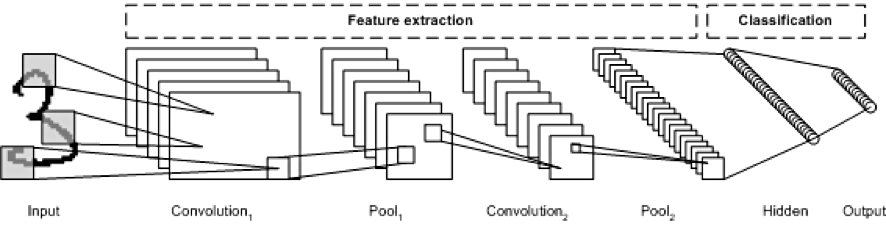


In [9]:
#Convolution layer and max pooling layer are made by lower code in pytorch

#torch.nn.Conv2d(in_channel= , out_channel=, kernel_size=, stride=, padding=)
#torch.nn.MaxPool2d(kernel_size =, stride =)

#Using sequential function, you can make the layer contained conlvoultion and pooling layer as shown in the following example.
# sefl.layer1 = torch.nn.Sequential(torch.nn.Conv2d(in_channel= , out_channel=, kernel_size=, stride=, padding=), 
#               torch.ReLU(),
#               torch.nn.MaxPool2d(kernel_size =, stride =))

###Problem 1(10pt)

#### Fill in the blanks of the code to complete, considering the output shape from the previous layer.

*Input data is assumed to be image data with one channel of 28x28 size, such as mnist.

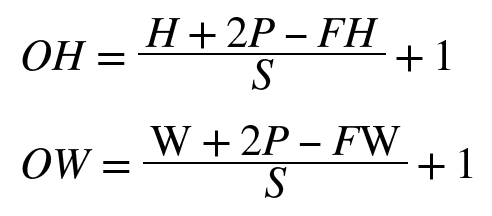

(H, W) = (input height, input width)

(FH, FW) = (filter height, filter width)

(OH, OW) = (output height, output width)

P: padding,   S: stride

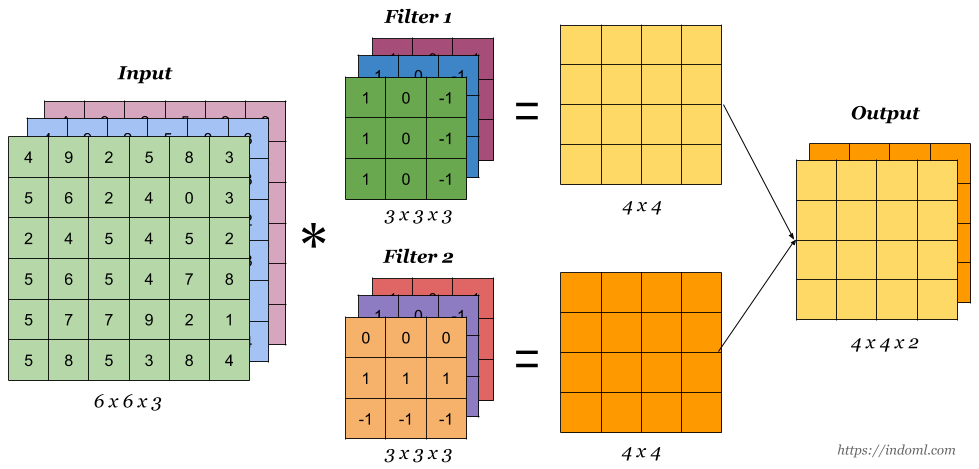

In [10]:
class CNN(torch.nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.layer1 = torch.nn.Sequential(
        torch.nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=0),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(kernel_size=2, stride=2))
        
    self.layer2 = torch.nn.Sequential(
          torch.nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=0),
          torch.nn.ReLU(),
          torch.nn.MaxPool2d(kernel_size=2, stride=2))

    self.layer3 = torch.nn.Sequential(
            torch.nn.Linear(1024, 625, bias=True),
            torch.nn.ReLU())

    self.fc = torch.nn.Linear(625, 10, bias=True)
  
  def forward(self, x):
    y = self.layer1(x)
    y = self.layer2(y)
    y = y.view(y.size(0), -1)   # Flatten them for FC
    y = self.layer3(y)
    y = self.fc(y)
    return y

###Problem 2(10pt)

How many parameters has to be trained in convolution layers? \\
(Hint1: # of out channel * # of parameters in the kernel) \\
(Hint2: you should consider the bias of convolution layer)

1. number of parameters in first conv2 layers: 832
2. number of parameters in second conv2 layers: 51264
3. number of parameters in third conv2 layers: 640625


###Problem 3(10pt)

###Using the upper code, implement your CNN model

*Using the torch.nn.Sequential layer, Make three or more convolution, pooling layer.

*One sequential layer must contain a convolution and pooling layer.

In [11]:
class CNN(torch.nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.layer1 = torch.nn.Sequential(
        torch.nn.Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=1))
        
    self.layer2 = torch.nn.Sequential(
          torch.nn.Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
          torch.nn.ReLU(),
          torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=1))

    self.layer3 = torch.nn.Sequential(
          torch.nn.Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
          torch.nn.ReLU(),
          torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=1))
    
    self.layer4 = torch.nn.Sequential(
          torch.nn.Linear(3200, 625, bias=True),
          torch.nn.ReLU())

    self.fc = torch.nn.Linear(625, 10, bias=True)
 

  def forward(self, x):
    y = self.layer1(x)
    y = self.layer2(y)
    y = self.layer3(y)
    y = y.view(y.size(0), -1)   # Flatten them for FC
    y = self.layer4(y)
    y = self.fc(y)
    return y

In [12]:
model = CNN()

In [13]:
#We can see the information of our model.
model.parameters

<bound method Module.parameters of CNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (layer4): Sequential(
    (0): Linear(in_features=3200, out_features=625, bias=True)
    (1): ReLU()
  )
  (fc): Linear(in_features=625, out_features=10, bias=True)
)>

##3. Visualize a filter(kernel)

In [14]:
#extract the filter map of the convolution layer
filter_map = []
for param in list(model.parameters()):
  if param.dim() == 4:
    print(param.shape)
    filter_map.append(param)

torch.Size([32, 1, 3, 3])
torch.Size([64, 32, 3, 3])
torch.Size([128, 64, 3, 3])


In [15]:
#Make the function for feature map visualization
#tensor = (input filter), ch = (channel of filter you want to see)
def visTensor(tensor, ch=0, allkernels=False, nrow=8, padding=1): 
  n,c,w,h = tensor.shape

  if allkernels: 
    tensor = tensor.view(n*c, -1, w, h)
  elif c != 3: 
    tensor = tensor[:,ch,:,:].unsqueeze(dim=1)
    
  rows = np.min((tensor.shape[0] // nrow + 1, 64))    
  grid = utils.make_grid(tensor, nrow=nrow, normalize=True, padding=padding)
  plt.figure( figsize=(nrow,rows) )
  plt.imshow(grid.numpy().transpose((1, 2, 0)))

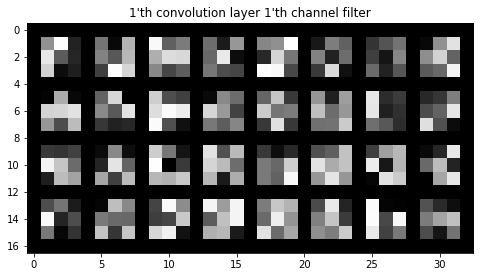

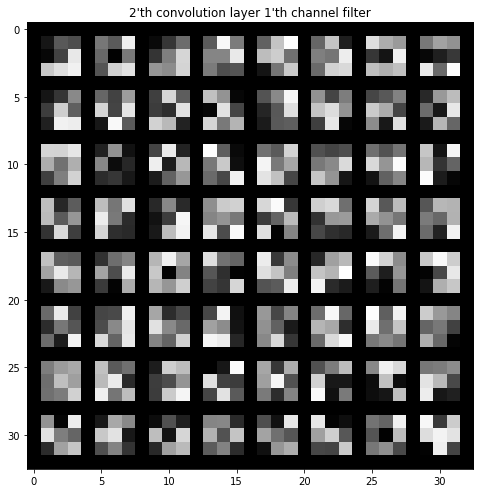

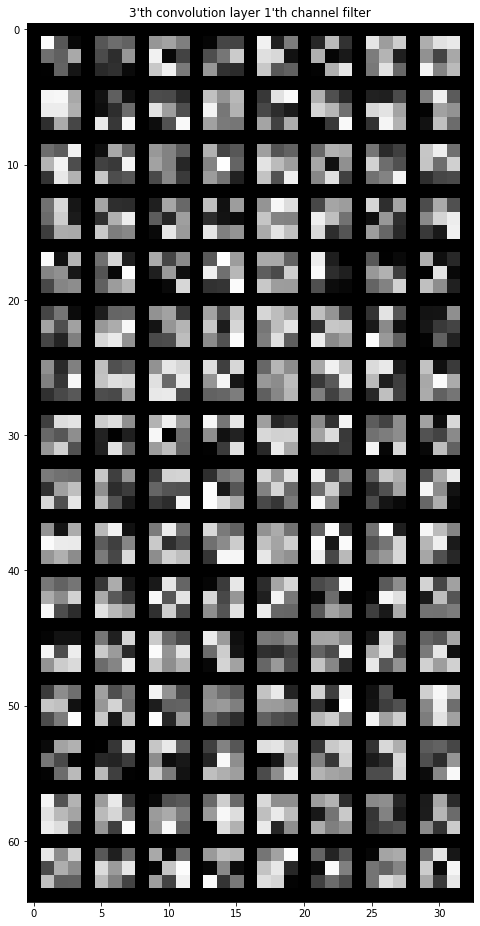

In [16]:
for n, weight in enumerate(filter_map):
  ch = 0
  visTensor(weight, ch=0, allkernels=False)
  plt.title(f'{n+1}\'th convolution layer {ch+1}\'th channel filter')

##4. Learning the mnist data using the CNN

In [17]:
#hyper-parameter allocation

learning_rate = 0.001
epochs = 15
batch_size = train_loader.batch_size

In [18]:
model = CNN()
loss_f = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
len_trainloader = len(train_loader)

In [19]:
#Training
for epoch in range(epochs):
  avg_loss = 0
  for x, y in train_loader: 
    optimizer.zero_grad()
    hypothesis = model(x)
    loss = loss_f(hypothesis, y)
    loss.backward()
    optimizer.step()
    avg_loss += loss / len_trainloader

  print(f'epoch: {epoch+1}, loss: {avg_loss}')

epoch: 1, loss: 0.7062960267066956
epoch: 2, loss: 0.12323198467493057
epoch: 3, loss: 0.06908109784126282
epoch: 4, loss: 0.051703885197639465
epoch: 5, loss: 0.034052666276693344
epoch: 6, loss: 0.027314897626638412
epoch: 7, loss: 0.022220605984330177
epoch: 8, loss: 0.017047254368662834
epoch: 9, loss: 0.014639339409768581
epoch: 10, loss: 0.007653836626559496
epoch: 11, loss: 0.007921931333839893
epoch: 12, loss: 0.004702388308942318
epoch: 13, loss: 0.01168017741292715
epoch: 14, loss: 0.0042951893992722034
epoch: 15, loss: 0.002320780884474516


In [20]:
#Test
with torch.no_grad():
  prediction = model(x_test)
  correct_prediction = torch.argmax(prediction, 1) == y_test
  accuracy = correct_prediction.float().mean()
  print('Accuracy:', accuracy.item())

Accuracy: 0.9984999895095825


###Problem 4(10pt)

###Visualize the filters of the learned cnn model

*Through comparison with filters visualized before learning, you can check whether the cnn model has been properly learned.

torch.Size([32, 1, 3, 3])
torch.Size([64, 32, 3, 3])
torch.Size([128, 64, 3, 3])


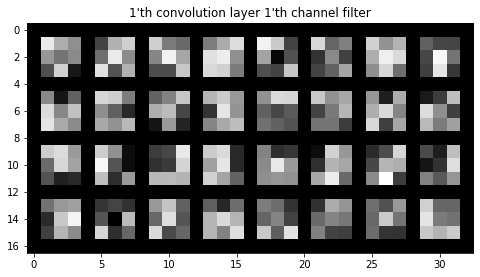

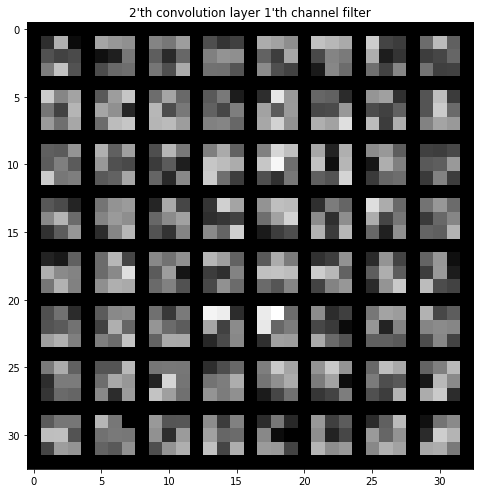

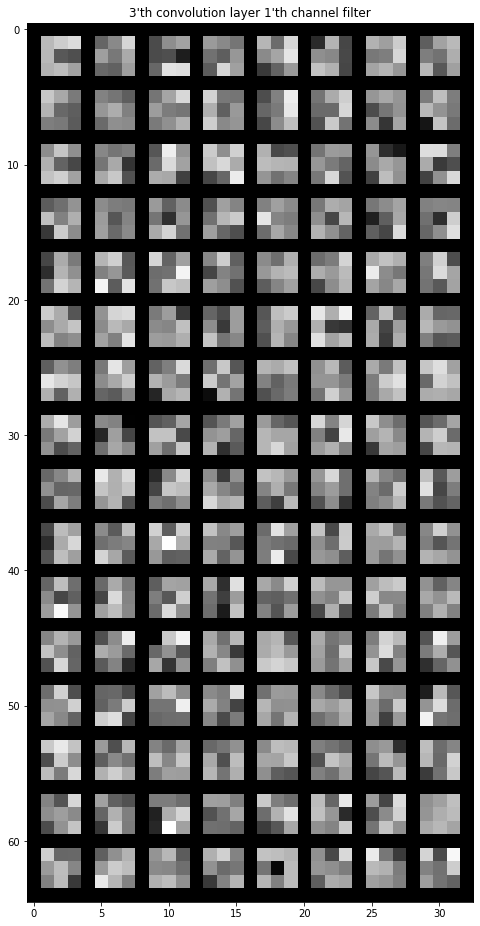

In [24]:
#Please write your code!
filter_map = []
for param in list(model.parameters()):
  if param.dim() == 4:
    print(param.shape)
    filter_map.append(param)

def visTensor(tensor, ch=0, allkernels=False, nrow=8, padding=1): 
  n,c,w,h = tensor.shape

  if allkernels: 
    tensor = tensor.view(n*c, -1, w, h)
  elif c != 3: 
    tensor = tensor[:,ch,:,:].unsqueeze(dim=1)
    
  rows = np.min((tensor.shape[0] // nrow + 1, 64))    
  grid = utils.make_grid(tensor, nrow=nrow, normalize=True, padding=padding)
  plt.figure( figsize=(nrow,rows) )
  plt.imshow(grid.numpy().transpose((1, 2, 0)))

for n, weight in enumerate(filter_map):
  ch = 0
  visTensor(weight, ch=0, allkernels=False)
  plt.title(f'{n+1}\'th convolution layer {ch+1}\'th channel filter')